<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/NYSE_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing important libraries
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

In [2]:
#calling the file in nyse named prices.csv
df =pd.read_csv("/content/prices.csv", header=0)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
106572,2010-11-24,TEL,31.150000,31.750000,31.150000,31.750000,1971200.0
106573,2010-11-24,TGNA,12.620000,12.920000,12.610000,12.920000,2513300.0
106574,2010-11-24,TGT,55.470001,57.250000,55.470001,57.340000,6958600.0
106575,2010-11-24,TIF,60.410000,61.330002,59.750000,61.580002,6792200.0


In [3]:
print(df.shape)

(106577, 7)


In [4]:
# takes 20 different and unique from symbol
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [5]:
# finind the length of column named symbol
print(len(df.symbol.values))

106577


In [6]:
#gives the details of each columns of the dataset like mean, max etc
df.describe()

,open,close,low,high,volume
count,106576.000000,106576.000000,106576.000000,106576.000000,1.065760e+05
mean,47.918877,47.939703,47.332197,48.478802,7.338217e+06
std,47.735584,47.714709,47.177159,48.242702,1.710604e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,24.990000,24.987499,24.660000,25.299999,1.545875e+06
50%,38.770000,38.790047,38.280024,39.240002,3.256750e+06
75%,56.650002,56.720001,55.992491,57.340000,6.802000e+06
max,630.001057,626.771094,624.241073,630.851095,6.551166e+08


In [7]:
#checking whether their is any null value in the dataset
# .sum() will give the total no. of null value column vise 
df.isnull().sum()

date      0
symbol    1
open      1
close     1
low       1
high      1
volume    1
dtype: int64

In [8]:
# taking all the unique or one time value in the date column 
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', '2016-01-08 00:00:00',
       '2016-01-11 00:00:00', '2016-01-12 00:00:00',
       '2016-01-13 00:00:00', '2016-01-14 00:00:00',
       '2016-01-15 00:00:00', '2016-01-19 00:00:00',
       '2016-01-20 00:00:00', '2016-01-21 00:00:00',
       '2016-01-22 00:00:00', '2016-01-25 00:00:00',
       '2016-01-26 00:00:00', '2016-01-27 00:00:00',
       '2016-01-28 00:00:00', '2016-01-29 00:00:00',
       '2016-02-01 00:00:00', '2016-02-02 00:00:00',
       '2016-02-03 00:00:00', '2016-02-04 00:00:00',
       '2016-02-05 00:00:00', '2016-02-08 00:00:00',
       '2016-02-09 00:00:00', '2016-02-10 00:00:00',
       '2016-02-11 00:00:00', '2016-02-12 00:00:00',
       '2016-02-16 00:00:00', '2016-02-17 00:00:00',
       '2016-02-18 00:00:00', '2016-02-19 00:00:00',
       '2016-02-22 00:00:00', '2016-02-23 00:00:00',
       '2016-02-24 00:00:00', '2016-02-25 00:00:00',
       '2016-02-26 00:00:00', '2016-02-29 00:0

In [10]:
#calling the file in nyse named securities.csv
comp_info = pd.read_csv('securities.csv')
comp_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [11]:
# taking total no. of unique values in column Ticket symbol
comp_info["Ticker symbol"].nunique()

505

In [12]:
# for locating specific data here.... in security column of string that starts with "Face"
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [13]:
# here we locate Ticker symbol of company with security like Yahoo, Xerox, Adobe etc 
# then taking their no. of times entry and thier "Ticker symbol"
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


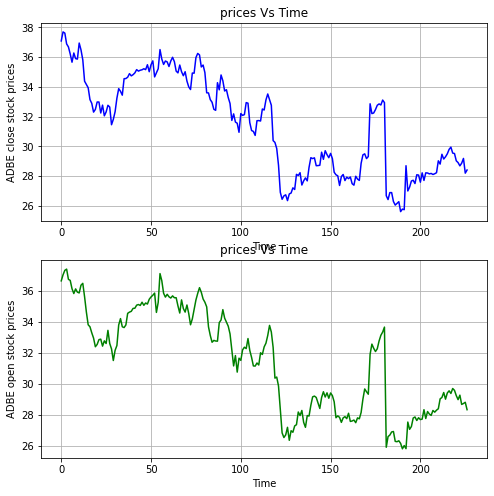

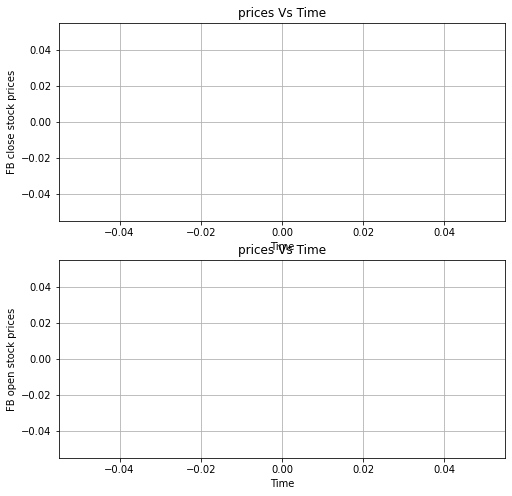

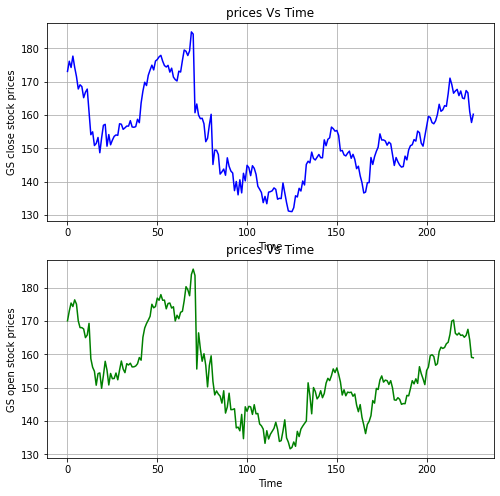

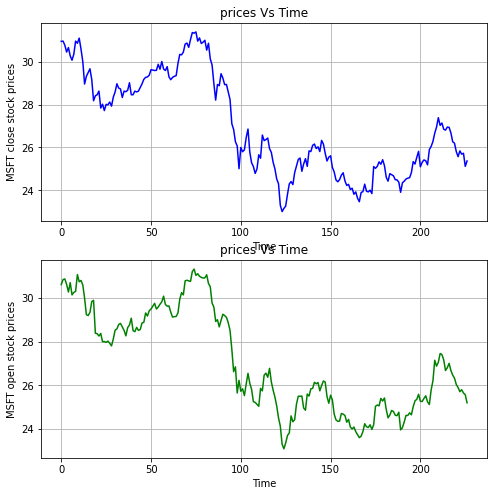

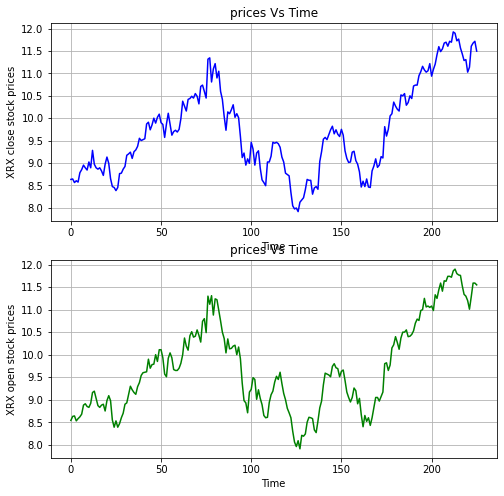

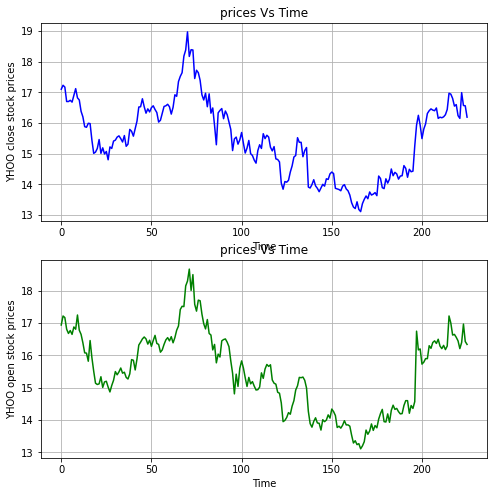

In [14]:
def plotter(code):
    
    global closing_stock ,opening_stock
    
    f, axs = plt.subplots(2,2,figsize=(8,8))
    
    plt.subplot(212)
    
    company = df[df['symbol']==code]
    
    company = company.open.values.astype('float32')
    
    company = company.reshape(-1, 1)
     
    opening_stock = company
    
    
    plt.grid(True)
    plt.xlabel('Time') 
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g') 
    
    
    plt.subplot(211)
    
    company_close = df[df['symbol']==code]
    
    company_close = company_close.close.values.astype('float32')
    
    company_close = company_close.reshape(-1, 1)
   
    closing_stock = company_close
    
    
    plt.xlabel('Time') 
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time') 
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show() 

# calling the graphs through the function    
for i in comp_plot:
    plotter(i)

**Lets take a single stock as a sample to forecast further stock prices.**

In [15]:
#taking the values of closing_stock in a single list
closing_stock[:,0]

array([17.1 , 17.23, 17.17, 16.7 , 16.7 , 16.74, 16.68, 16.9 , 17.12,
       16.82, 16.75, 16.38, 16.2 , 15.88, 15.86, 15.99, 15.98, 15.44,
       15.01, 15.05, 15.17, 15.46, 15.01, 15.19, 14.99, 15.07, 14.8 ,
       15.22, 15.17, 15.41, 15.44, 15.54, 15.58, 15.49, 15.38, 15.59,
       15.24, 15.31, 15.79, 15.73, 15.57, 15.81, 16.06, 16.52, 16.53,
       16.79, 16.53, 16.32, 16.46, 16.36, 16.5 , 16.56, 16.44, 16.34,
       16.03, 16.09, 16.32, 16.54, 16.56, 16.61, 16.53, 16.29, 16.51,
       16.92, 16.87, 17.35, 17.52, 17.64, 18.18, 18.38, 18.97, 18.17,
       18.39, 18.38, 17.45, 17.72, 17.64, 17.39, 16.92, 16.75, 16.97,
       16.53, 16.95, 16.32, 16.49, 15.92, 15.29, 16.33, 16.41, 16.47,
       16.14, 16.39, 16.27, 16.03, 15.79, 15.1 , 15.48, 15.54, 15.31,
       15.45, 15.69, 15.34, 15.02, 15.18, 15.43, 15.  , 14.94, 14.79,
       14.69, 15.1 , 15.29, 15.17, 15.65, 15.49, 15.6 , 15.54, 15.21,
       15.09, 15.23, 14.83, 14.81, 14.73, 14.04, 13.84, 14.09, 14.07,
       14.13, 14.4 ,

In [16]:
#taking the values of closing_stock in a single list called stocks
stocks = closing_stock[: , 0]
print(stocks)
#reshaping the stocks in 1D array form
stocks = stocks.reshape(len(stocks) , 1)

[17.1  17.23 17.17 16.7  16.7  16.74 16.68 16.9  17.12 16.82 16.75 16.38
 16.2  15.88 15.86 15.99 15.98 15.44 15.01 15.05 15.17 15.46 15.01 15.19
 14.99 15.07 14.8  15.22 15.17 15.41 15.44 15.54 15.58 15.49 15.38 15.59
 15.24 15.31 15.79 15.73 15.57 15.81 16.06 16.52 16.53 16.79 16.53 16.32
 16.46 16.36 16.5  16.56 16.44 16.34 16.03 16.09 16.32 16.54 16.56 16.61
 16.53 16.29 16.51 16.92 16.87 17.35 17.52 17.64 18.18 18.38 18.97 18.17
 18.39 18.38 17.45 17.72 17.64 17.39 16.92 16.75 16.97 16.53 16.95 16.32
 16.49 15.92 15.29 16.33 16.41 16.47 16.14 16.39 16.27 16.03 15.79 15.1
 15.48 15.54 15.31 15.45 15.69 15.34 15.02 15.18 15.43 15.   14.94 14.79
 14.69 15.1  15.29 15.17 15.65 15.49 15.6  15.54 15.21 15.09 15.23 14.83
 14.81 14.73 14.04 13.84 14.09 14.07 14.13 14.4  14.6  14.89 14.94 15.52
 15.37 15.37 14.9  15.1  15.2  13.91 13.88 13.99 14.15 13.95 13.87 13.76
 13.88 14.   13.94 14.18 14.16 14.34 14.4  14.35 13.87 13.85 13.83 13.79
 13.94 13.99 13.85 13.79 13.65 13.4  13.26 13.21 13.

**Feature scaling the vector for better model performance.**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling features between 0 and 1
stocks = scaler.fit_transform(stocks) # it will start learning algo and then provide scaled and dimension reduced output

In [19]:
train = int(len(stocks) * 0.80) #creating sizes of train and taking 80% percentage of the part
test = len(stocks) - train #creating sizes of test as total minus train

In [20]:
#sizes of train and test
print(train , test)

180 46


In [21]:
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
print(train)

[[0.68088746]
 [0.7030716 ]
 [0.6928327 ]
 [0.6126282 ]
 [0.6126282 ]
 [0.6194539 ]
 [0.609215  ]
 [0.6467576 ]
 [0.6843004 ]
 [0.63310575]
 [0.6211605 ]
 [0.55802035]
 [0.52730393]
 [0.4726963 ]
 [0.46928334]
 [0.49146748]
 [0.4897611 ]
 [0.3976109 ]
 [0.3242321 ]
 [0.33105803]
 [0.3515358 ]
 [0.40102386]
 [0.3242321 ]
 [0.35494876]
 [0.32081914]
 [0.334471  ]
 [0.28839588]
 [0.36006832]
 [0.3515358 ]
 [0.39249134]
 [0.3976109 ]
 [0.4146757 ]
 [0.42150164]
 [0.40614343]
 [0.38737202]
 [0.42320824]
 [0.36348128]
 [0.37542677]
 [0.45733786]
 [0.44709897]
 [0.41979527]
 [0.46075106]
 [0.50341296]
 [0.5819113 ]
 [0.5836179 ]
 [0.62798643]
 [0.5836179 ]
 [0.54778147]
 [0.5716722 ]
 [0.5546076 ]
 [0.57849836]
 [0.588737  ]
 [0.5682595 ]
 [0.55119467]
 [0.49829364]
 [0.5085325 ]
 [0.54778147]
 [0.5853243 ]
 [0.588737  ]
 [0.5972698 ]
 [0.5836179 ]
 [0.5426624 ]
 [0.5802047 ]
 [0.65017056]
 [0.6416383 ]
 [0.7235496 ]
 [0.7525599 ]
 [0.77303743]
 [0.8651879 ]
 [0.89931726]
 [1.        ]
 [0.86

In [22]:
#divinding the values of stocks data to test from train ending to stock data ending i.e rest 20% data
test = stocks[len(train) : ]

In [23]:
#reshaping train data in 1D array form
train = train.reshape(len(train) , 1)
#reshaping test data in 1D array form
test = test.reshape(len(test) , 1)

In [24]:
#new train and test array shape
print(train.shape , test.shape)

(180, 1) (46, 1)


In [25]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] 
    for i in range(len(data)-n_features-1):
        
        a = data[i:(i+n_features), 0]
        
        dataX.append(a) 
        
        dataY.append(data[i + n_features, 0])
        
    return np.array(dataX), np.array(dataY)

#so the stucture of trainX and trainY is somehow like this
# trainX=[[i1 , i2,...., i n_features ]] and trainY=[i + n_features]  
# trainY will show the future value of trainX values

In [26]:
n_features = 2

trainX, trainY = process_data(train, n_features)

testX, testY = process_data(test, n_features)


In [27]:
# printing the structure of train X,Y and test X,Y
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(177, 2) (177,) (43, 2) (43,)


In [28]:
# reshaping trainX and testX to use in deeplearning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [33]:
import math 
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation # types of layers
from keras.layers import LSTM , GRU 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from tensorflow.keras.optimizers import Adam , SGD , RMSprop 

In [34]:
filepath="stock_weights1.hdf5"

from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [35]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()

model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-trai

In [36]:
# selecting the loss measurement metrics and optimizer for our model , to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
# fitting the data i.e training the trainX, to relate to trainY
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    
#callbacks are proper

Epoch 1/100
1/2 [==============>...............] - ETA: 4s - loss: 0.2149 - mean_squared_error: 0.2149
Epoch 1: val_loss improved from -inf to 0.19645, saving model to stock_weights1.hdf5
2/2 [==============================] - 6s 1s/step - loss: 0.2022 - mean_squared_error: 0.2022 - val_loss: 0.1964 - val_mean_squared_error: 0.1964 - lr: 5.0000e-04
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 2: val_loss did not improve from 0.19645
2/2 [==============================] - 0s 69ms/step - loss: 0.1811 - mean_squared_error: 0.1811 - val_loss: 0.1750 - val_mean_squared_error: 0.1750 - lr: 5.0000e-04
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1558 - mean_squared_error: 0.1558
Epoch 3: val_loss did not improve from 0.19645
2/2 [==============================] - 0s 93ms/step - loss: 0.1604 - mean_squared_error: 0.1604 - val_loss: 0.1517 - val_mean_squared_error: 0.1517 - lr: 5.0000e-04
Epoch 4/100
1/2 [==

In [38]:
#predicting the value for testX
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)

pred[:10]
# taking pred from 1 to 10

array([[15.0511  ],
       [15.047194],
       [15.196658],
       [15.233918],
       [15.197189],
       [15.217176],
       [15.145622],
       [15.122155],
       [15.158246],
       [15.26862 ]], dtype=float32)

In [39]:
# reshaping testY in single array
testY = testY.reshape(testY.shape[0] , 1)

testY = scaler.inverse_transform(testY)

testY[:10]

array([[14.17    ],
       [14.500001],
       [14.28    ],
       [14.39    ],
       [14.340001],
       [14.17    ],
       [14.27    ],
       [14.28    ],
       [14.61    ],
       [14.52    ]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


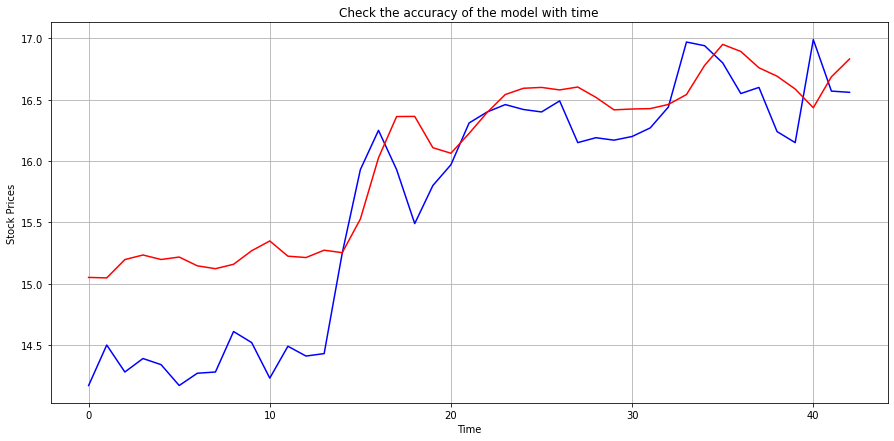

In [40]:
# ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY , 'b')

plt.plot(pred , 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')

plt.grid(True)

plt.show()